## Project 1 : Kannada MNIST - Classification Problem

### Problem Statement: This is an extension of clasic MNIST classification problem. Instead of using Hindu numerals, lets use a recently-released dataset of Kannada digits. This is a 10 Class classification problem.

### Kannada is a language spoken predominantly by people of Karnataka in southwestern India. The language has roughly 45 million native speakers and is written using the Kannada script. https: //en.wikipedia.org/wiki/Kannada

### Dataset can be downloaded from the link : https://www.kaggle.com/datasets/higgstachyon/kannada-mnist. 

### All details of the dataset curation has been captured in the paper titled: Prabhu, Vinay Uday. "KannadaMNIST: A new handwritten digits dataset for the Kannada language."https://arxiv.org/abs/1908.01242

### Procedure:

#### 1. Extract the dataset from the npz file from the downloaded dataset or from the web.There are 60000 images for training and 10000 images for test. Each image is of the size 28X28.

#### 2. Perform PCA to 10 components. So now we have train and test images in 10 dimension instead of 28X28 dimension.

#### 3. Now apply the the following models:
#### • Decision Trees
#### • Random forest
#### • Naive Bayes Model
#### • K-NN Classifier
#### • SVM

#### 4. For each of this method produce the following metrics:
#### • Precision, Recall, F1 - Score
#### • Confusion Matrix
#### • RoC - AUC curve

#### 5. Try to repeat the same experiment for different component size : 15,20,25,30

In [1]:
import numpy as np

# Load the training data and labels
train_data = np.load('X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load('y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load('X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load('y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [2]:
# Load the npz file
dataset = np.load('X_kannada_MNIST_train.npz')

# Extract the data
x_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


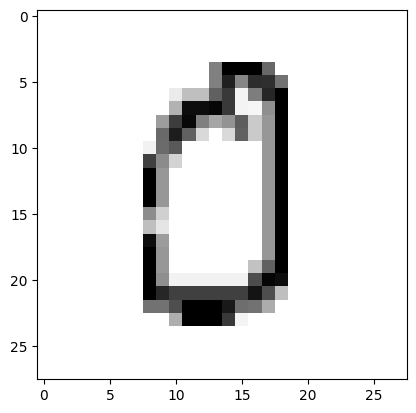

In [3]:
import matplotlib.pyplot as plt
import matplotlib

some_digit=X_train[90]
some_digit_img=some_digit.reshape(28,28,1)

plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [4]:
from sklearn.decomposition import PCA

def pcacompo(num,X_train_2d,X_test_2d):
  pca = PCA(n_components=num)
  X_trainpca = pca.fit_transform(X_train_2d)
  X_testpca = pca.transform(X_test_2d)
  return X_trainpca,X_testpca

X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

X_train_pca,X_test_pca = pcacompo(10,X_train_2d,X_test_2d)

X_train_pca,X_test_pca = pcacompo(15,X_train_2d,X_test_2d)


In [5]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)


    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
     
dt_classifier = DecisionTreeClassifier()
dt_accuracy, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Accuracy: 0.8083
Decision Tree F1-score: 0.8073706453735587
Decision Tree Recall: 0.8083
Decision Tree ROC-AUC: 0.8935000000000001
Decision Tree Confusion Matrix:
[[733 145  11  35   6   5   7   8  35  15]
 [ 81 804   7  28   4  15   5  10  28  18]
 [  6   3 938  13   5  16   8   3   3   5]
 [ 15  12  12 794  23  31  34  56  13  10]
 [  0   0   4  30 833  59  18  10  23  23]
 [  4   1  13  16 112 812   7   9  16  10]
 [ 10   3  11  52  28  21 775  69  11  20]
 [  6  13   7  49  33  12 124 679  12  65]
 [ 35  20   9   3   6  21   4   6 880  16]
 [  9  35   4  11  18  10  10   7  61 835]]


In [7]:
rf_classifier = RandomForestClassifier()
rf_accuracy, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix",rf_confusion_matrix)

Random Forest Accuracy: 0.8928
Random Forest F1-score: 0.8922002527422046
Random Forest Recall: 0.8928
Random Forest ROC-AUC: 0.9923664055555556
Random Forest Confusion Matrix [[793 155   3  19   4   0   2   2  16   6]
 [ 19 925   1  24   6   1   0   1  13  10]
 [  4   1 983   2   0   5   1   0   2   2]
 [  8   8   2 921  17  15   8  18   3   0]
 [  0   0   0  19 935  24   4   4   8   6]
 [  0   1   1  10 107 870   2   2   5   2]
 [  3   5   2  32  21  26 863  29   2  17]
 [  9  10   0  33  23   6 103 771   6  39]
 [ 17   6   1   1   1   6   2   0 964   2]
 [  3   6   0   0  17   0   8   2  61 903]]


In [8]:
nb_classifier = GaussianNB()
nb_accuracy, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.7838
Naive Bayes F1-score: 0.7822595027659803
Naive Bayes Recall: 0.7838
Naive Bayes ROC-AUC: 0.9747956444444446
Naive Bayes Confusion Matrix:
[[601 238  19  47  11   0   2  13  61   8]
 [ 17 776   8  96  18   6   0   2  60  17]
 [  9   2 975   5   0   6   1   0   1   1]
 [ 18  11   3 794  37  19  32  86   0   0]
 [  0   1   1  18 872  43   2  21  32  10]
 [  0   1   8  35 176 737   5  20  13   5]
 [  6   7  49  20  25  41 787  49   3  13]
 [  7  16   8  50  37   1 193 674   2  12]
 [116  24  20   3   3   6   3   1 817   7]
 [ 27  12   3   0  30   0  13   9 101 805]]


In [9]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_accuracy, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Accuracy:", knn_accuracy)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix")
print(knn_confusion_matrix)

K-NN Accuracy: 0.9082
K-NN F1-score: 0.9076358077269348
K-NN Recall: 0.9082000000000001
K-NN ROC-AUC: 0.9827128833333333
K-NN Confusion Matrix
[[803 161   2  14   7   0   2   0   8   3]
 [ 16 962   0   5   6   0   0   0   7   4]
 [  3   1 986   4   0   4   1   0   1   0]
 [  9  11   1 915  25  24   2   9   3   1]
 [  0   1   0   5 974   9   1   1   4   5]
 [  0   0   0  10  93 893   2   0   1   1]
 [  2   1   0  23  28  10 893  34   0   9]
 [  7   8   1  35  29   6 122 762   2  28]
 [ 18   6   2   1   2   4   3   0 961   3]
 [  8   8   0   0  19   5   7   2  18 933]]


In [10]:
svm_classifier = SVC(probability=True)
svm_accuracy, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix")
print(svm_confusion_matrix)

SVM Accuracy: 0.9151
SVM F1-score: 0.914602282119654
SVM Recall: 0.9151
SVM ROC-AUC: 0.9953871777777777
SVM confusion Matrix
[[825 129   1  18   5   0   0   5  12   5]
 [ 14 953   0  12   3   2   1   2   9   4]
 [  3   0 987   3   0   3   1   1   2   0]
 [  7   7   0 916  17  17   6  28   2   0]
 [  0   1   0   9 960  14   2   1   6   7]
 [  0   0   0   8 101 886   2   0   3   0]
 [  1   2   1  21  19  20 909  10   1  16]
 [ 17   9   0  21  17   1  84 801   2  48]
 [  6   3   2   1   2   3   1   0 977   5]
 [  5   9   0   0   8   0   5   0  36 937]]


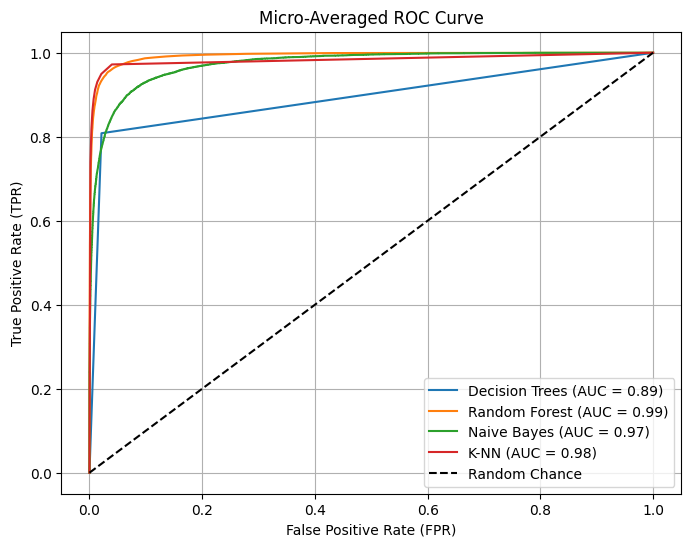

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

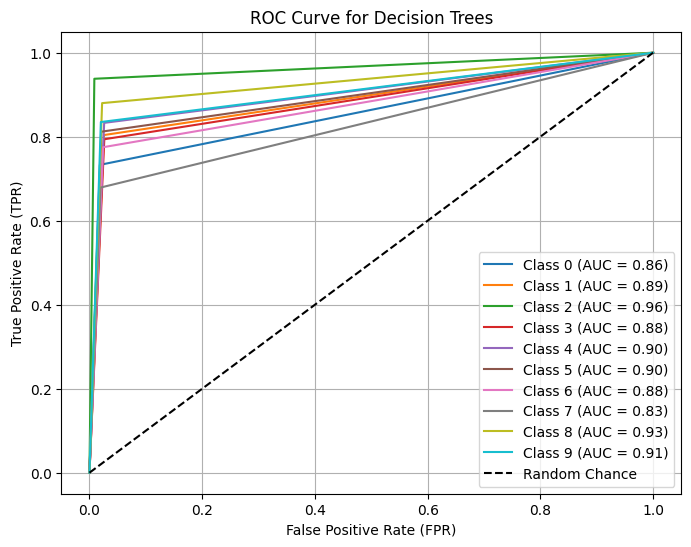

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()    

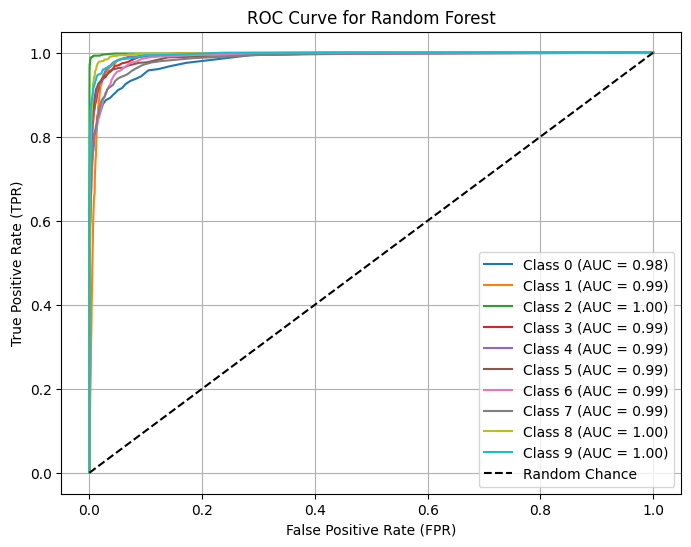

In [13]:
# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])
    
# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

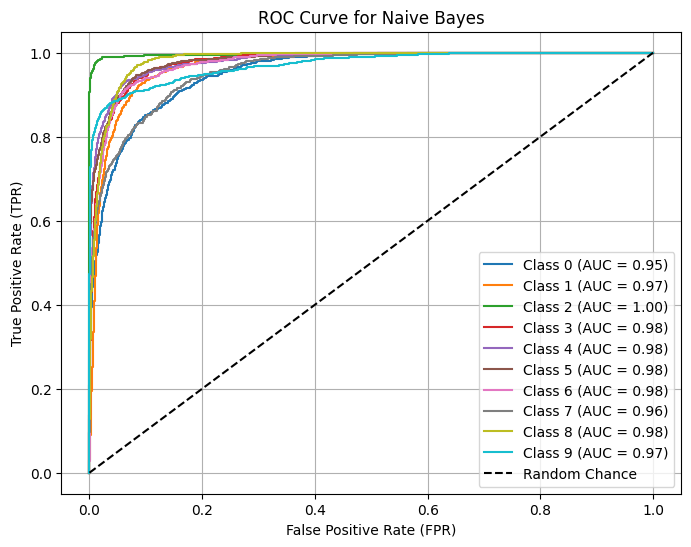

In [14]:
# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])
    
# Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

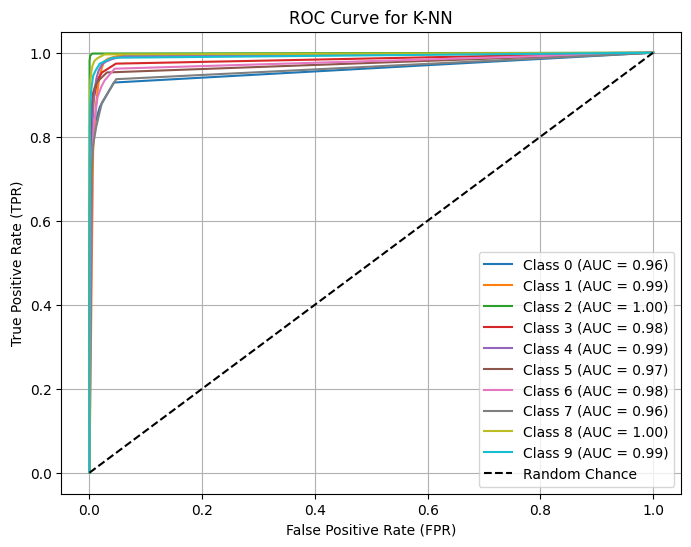

In [15]:
# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()